# Association Rule Learning for Bread Basket Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context('talk')


import os
import warnings
warnings.filterwarnings("ignore")



# setting params
params = {'legend.fontsize': 'medium',
          'figure.figsize': (14, 10),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'small',
          'ytick.labelsize':'medium'}


plt.rcParams.update(params)
pd.options.display.max_colwidth = 60 #(long description)
pd.set_option('display.max_columns', 50)



np.set_printoptions(precision=3,suppress=True)


pd.set_option('display.max_rows', 50)

pd.set_option('display.width', 100)
    


In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [4]:
df.Item.value_counts().head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

In [5]:
df.Item.nunique()

95

In [6]:
df.Transaction.describe()

count    21293.000000
mean      4951.990889
std       2787.758400
min          1.000000
25%       2548.000000
50%       5067.000000
75%       7329.000000
max       9684.000000
Name: Transaction, dtype: float64

In [7]:
df=df[~(df.Item== 'NONE')]

In [8]:
df.Transaction.value_counts()

6279    11
6716    11
6412    11
6474    11
6045    10
        ..
9004     1
4922     1
6971     1
6987     1
2049     1
Name: Transaction, Length: 9465, dtype: int64

In [9]:
df.Date.min()

'2016-10-30'

In [10]:
df.Date.max()

'2017-04-09'

# Top 10 Most Selling Items

In [11]:
item_10=df.Item.value_counts().reset_index().head(10)
item_10.rename(columns={'index':'item', 'Item':'count'}, inplace=True)
item_10

,item,count
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


In [12]:
item_10['item'].value_counts().index

Index(['Hot chocolate', 'Brownie', 'Coffee', 'Sandwich', 'Tea', 'Cake', 'Cookies', 'Pastry',
       'Bread', 'Medialuna'],
      dtype='object')

In [13]:
item_10['item'].values

array(['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich',
       'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie'], dtype=object)

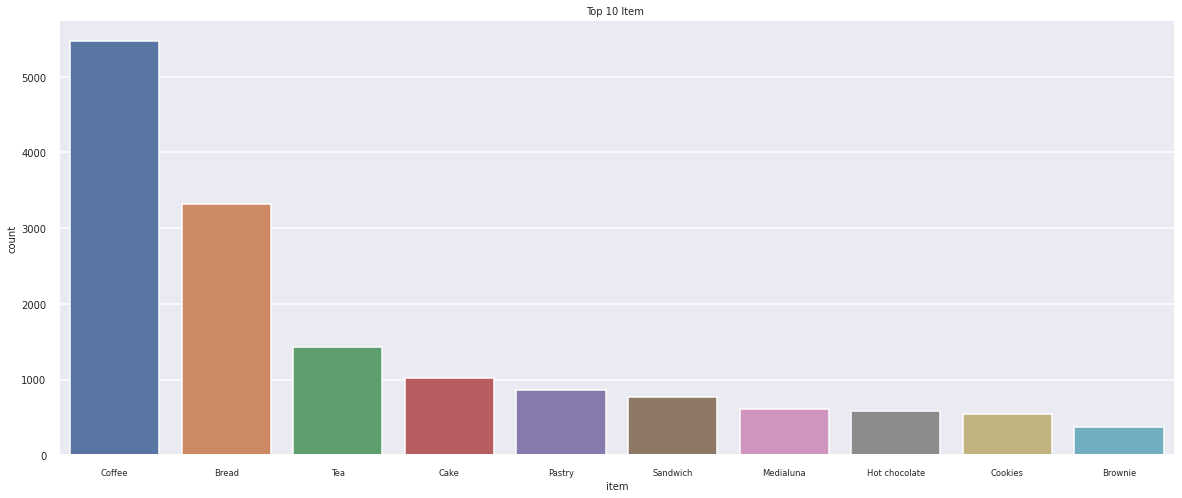

In [14]:
plt.figure(figsize=(20,8))
sns.barplot('item','count', data=item_10)
plt.title('Top 10 Item ')

plt.show()

In [15]:
df['Item'].value_counts().sort_values(ascending=False).head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

In [16]:
df.groupby('Item')['Transaction'].sum().sort_values()

Item
Chicken sand          68
The BART             475
Adjustment           938
Bacon               1248
Fairy Doors         1666
                  ...   
Sandwich         4344466
Cake             5932362
Tea              7030856
Bread           16213533
Coffee          27084057
Name: Transaction, Length: 94, dtype: int64

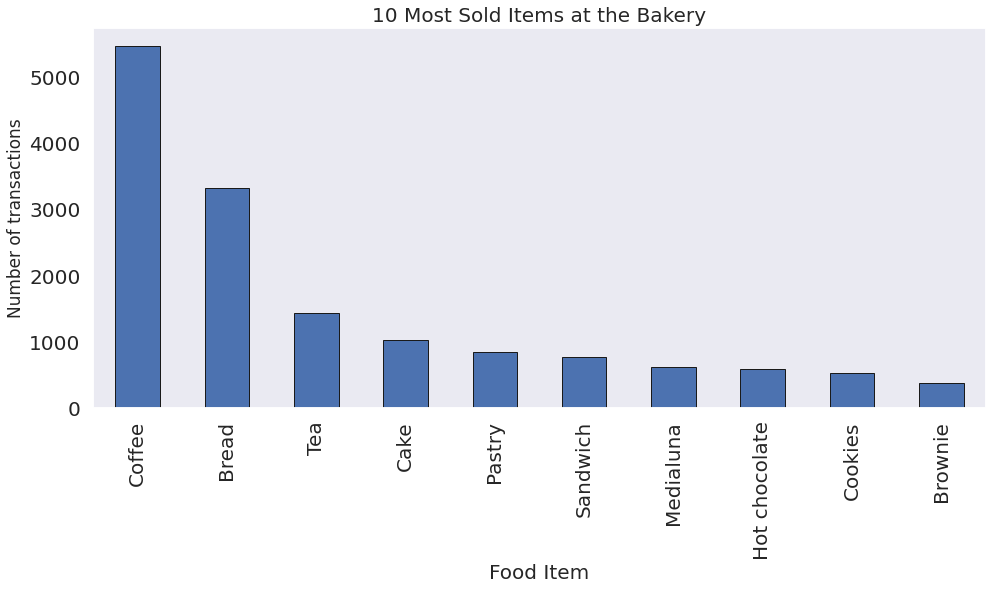

In [17]:
fig, ax=plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('10 Most Sold Items at the Bakery',fontsize=20)
plt.grid()
plt.ioff()

In [18]:
import datetime

In [19]:
df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour

In [20]:
df.head()

,Date,Time,Transaction,Item,datetime,Week,Month,Weekday,Hours
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,43,10,6,9
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,43,10,6,10
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,43,10,6,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,43,10,6,10
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,43,10,6,10


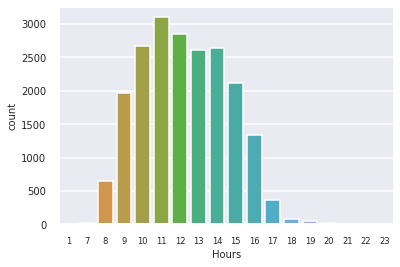

In [21]:
sns.countplot(df['Hours'])

plt.show()

In [22]:
df['Hours'].max()

23

In [23]:
df['Hours'].min()

1

In [24]:
df1=df[['Date','Transaction', 'Month','Week', 'Weekday','Hours']]


In [25]:
df1.head()

,Date,Transaction,Month,Week,Weekday,Hours
0,2016-10-30,1,10,43,6,9
1,2016-10-30,2,10,43,6,10
2,2016-10-30,2,10,43,6,10
3,2016-10-30,3,10,43,6,10
4,2016-10-30,3,10,43,6,10


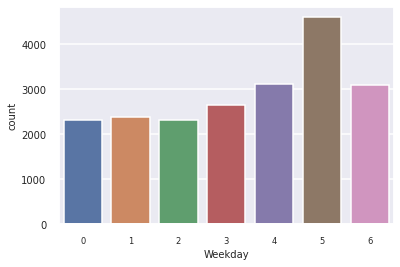

In [26]:
sns.countplot(x='Weekday',data=df1)
plt.show()


In [27]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [28]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [29]:
hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9465 entries, 1 to 9684
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Adjustment                     9465 non-null   float64
 1   Afternoon with the baker       9465 non-null   float64
 2   Alfajores                      9465 non-null   float64
 3   Argentina Night                9465 non-null   float64
 4   Art Tray                       9465 non-null   float64
 5   Bacon                          9465 non-null   float64
 6   Baguette                       9465 non-null   float64
 7   Bakewell                       9465 non-null   float64
 8   Bare Popcorn                   9465 non-null   float64
 9   Basket                         9465 non-null   float64
 10  Bowl Nic Pitt                  9465 non-null   float64
 11  Bread                          9465 non-null   float64
 12  Bread Pudding                  9465 non-null   f

In [30]:
hot_encoded_df.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,...,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [32]:
hot_encoded_df.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,...,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9465 entries, 1 to 9684
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Adjustment                     9465 non-null   int64
 1   Afternoon with the baker       9465 non-null   int64
 2   Alfajores                      9465 non-null   int64
 3   Argentina Night                9465 non-null   int64
 4   Art Tray                       9465 non-null   int64
 5   Bacon                          9465 non-null   int64
 6   Baguette                       9465 non-null   int64
 7   Bakewell                       9465 non-null   int64
 8   Bare Popcorn                   9465 non-null   int64
 9   Basket                         9465 non-null   int64
 10  Bowl Nic Pitt                  9465 non-null   int64
 11  Bread                          9465 non-null   int64
 12  Bread Pudding                  9465 non-null   int64
 13  Brioche and salami

In [34]:
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)


In [35]:
frequent_itemsets.head(10)

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
5,0.012995,(Chicken Stew)
6,0.478394,(Coffee)
7,0.019440,(Coke)
8,0.054411,(Cookies)
9,0.039197,(Farm House)


In [36]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('conviction', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
39,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
10,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865


In [37]:
#confidence > 0.5
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)].sort_values('confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


The support value for the this rule is 0.023666. This number is calculated by dividing the number of transactions containing toast divided by total number of transactions. 

The confidence level for the rule is 0.704403 which shows that out of all the transactions that contain toast , 70.44% of the transactions also contain coffee. 

Finally, the lift of 1.47 tells us that coffee is 1.47 times more likely to be bought by the customers who buy toast compared to the default likelihood of the sale of coffee

In [38]:
support = rules['support'].to_numpy()
confidence = rules['confidence'].to_numpy()


In [39]:
(len(support))

42

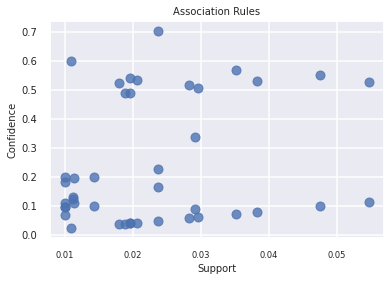

In [42]:
import seaborn as sns

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]
    
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()

# Another Way

In [44]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=fc12b770af2d6f26f44c3b8e9a9305b0786f8f511e2beda99b7c4a9993a5a193
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [45]:
df.head()

,Date,Time,Transaction,Item,datetime,Week,Month,Weekday,Hours
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,43,10,6,9
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,43,10,6,10
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,43,10,6,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,43,10,6,10
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,43,10,6,10


In [104]:
df_lunch=df.loc[(df['Hours']>=10 )& (df['Hours']<=15)]

In [105]:
df_lunch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15994 entries, 1 to 21292
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         15994 non-null  object        
 1   Time         15994 non-null  object        
 2   Transaction  15994 non-null  int64         
 3   Item         15994 non-null  object        
 4   datetime     15994 non-null  datetime64[ns]
 5   Week         15994 non-null  int64         
 6   Month        15994 non-null  int64         
 7   Weekday      15994 non-null  int64         
 8   Hours        15994 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 1.2+ MB


In [106]:
item=df_lunch[['Transaction', 'Item']]

In [107]:
item=item.loc[item.Item !='Adjustment']

In [136]:
item.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

Item,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,...,Pastry,Pick and Mix Bowls,Polenta,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
lunch = lunch.applymap(encode_units)

In [139]:
frequent_itemsets = apriori(lunch, min_support=0.01, use_colnames=True)

In [143]:
frequent_itemsets.head(10).sort_values('support', ascending=False)

,support,itemsets
6,0.484403,(Coffee)
2,0.323305,(Bread)
4,0.109802,(Cake)
8,0.053792,(Cookies)
3,0.042423,(Brownie)
9,0.037710,(Farm House)
0,0.036462,(Alfajores)
7,0.020241,(Coke)
5,0.016498,(Chicken Stew)
1,0.015943,(Baguette)


In [144]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('conviction', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.030778,0.484403,0.022321,0.725225,1.497152,0.007412,1.876434
29,(Spanish Brunch),(Coffee),0.022459,0.484403,0.013309,0.592593,1.223346,0.002430,1.265556
18,(Medialuna),(Coffee),0.053792,0.484403,0.031332,0.582474,1.202458,0.005275,1.234886
23,(Pastry),(Coffee),0.076113,0.484403,0.044087,0.579235,1.195770,0.007218,1.225380
34,(Soup),(Tea),0.043117,0.148205,0.011091,0.257235,1.735673,0.004701,1.146789
1,(Alfajores),(Coffee),0.036462,0.484403,0.019964,0.547529,1.130316,0.002302,1.139512
41,"(Coffee, Tea)",(Cake),0.052405,0.109802,0.010952,0.208995,1.903382,0.005198,1.125401
24,(Sandwich),(Coffee),0.087481,0.484403,0.047276,0.540412,1.115625,0.004900,1.121868
15,(Hot chocolate),(Coffee),0.056010,0.484403,0.030223,0.539604,1.113956,0.003092,1.119899
17,(Juice),(Coffee),0.040344,0.484403,0.021766,0.539519,1.113781,0.002224,1.119692
